In [2]:
from sklearn.linear_model import LogisticRegression
import seaborn as sn
x = [[10000],[20000],[15000],[30000],]
y = [0,1,0,1]
model = LogisticRegression()
model.fit(x,y)
print(model.predict([[50000]]))

[1]


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("loan_data.csv")
df.head()
df.info()
df.columns
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


(981, 13)

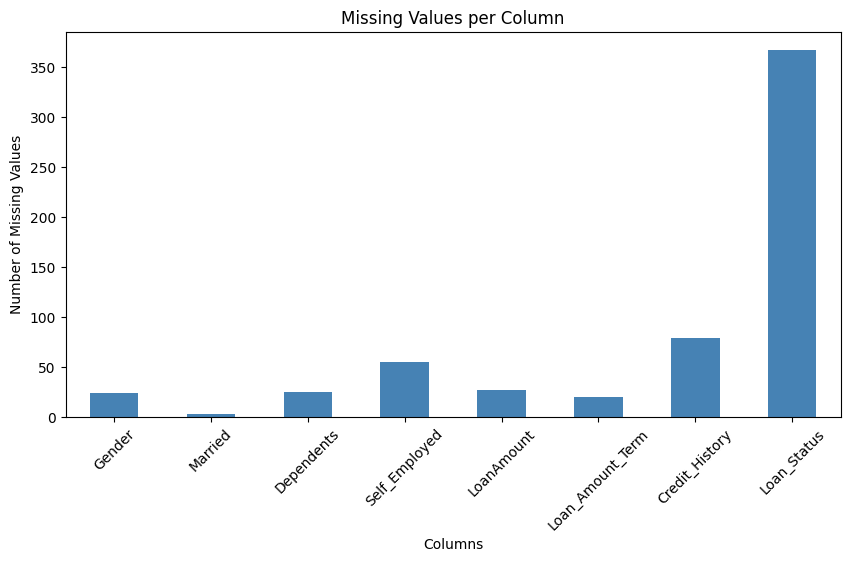

In [4]:
import matplotlib.pyplot as plt

missing = df.isna().sum()

plt.figure(figsize=(10,5))
missing[missing > 0].plot(kind='bar', color='steelblue')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

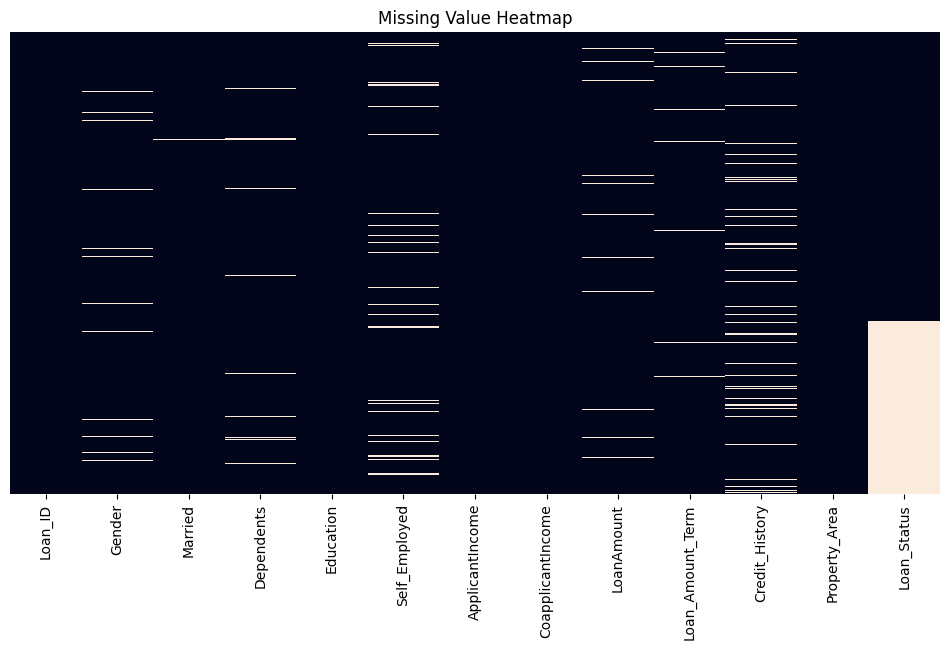

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

In [6]:
target = 'Loan_Status'

categorical_cols = df.select_dtypes(include=['object', 'string']).columns
categorical_cols = categorical_cols.drop(target)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [7]:
target = 'Loan_Status'

df = df[df[target].notna()]  # drop missing Loan_Status
X = df.drop(columns=[target])
y = df[target]

In [8]:
categorical_cols = X.select_dtypes(include=['object', 'string']).columns

for col in categorical_cols:
    X[col], _ = pd.factorize(X[col])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=3000)
model.fit(X_train, y_train)

c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[23 15]
 [ 9 76]]

Classification Report:
               precision    recall  f1-score   support

           N       0.72      0.61      0.66        38
           Y       0.84      0.89      0.86        85

    accuracy                           0.80       123
   macro avg       0.78      0.75      0.76       123
weighted avg       0.80      0.80      0.80       123



In [12]:
new_applicant = pd.DataFrame({
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents': ['1'],
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [0.0],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1.0],
    'Property_Area': ['Urban']
})

In [13]:
if 'Loan_ID' in new_applicant.columns:
    new_applicant = new_applicant.drop(columns=['Loan_ID'])
categorical_cols = [col for col in categorical_cols if col not in ['Loan_Status', 'Loan_ID']]
for col in categorical_cols:
    if col in new_applicant.columns:
        new_applicant[col] = pd.Categorical(new_applicant[col], categories=df[col].unique()).codes
for col in X_train.columns:
    if col not in new_applicant.columns:
        new_applicant[col] = 0 
new_applicant = new_applicant[X_train.columns]

In [14]:
prediction = model.predict(new_applicant)
probability = model.predict_proba(new_applicant)[:, 1]

print("Predicted Loan Status:", prediction[0])
print("Approval Probability:", probability[0])

Predicted Loan Status: Y
Approval Probability: 0.6040953045500523


In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


df = pd.read_csv("loan_data.csv")
df = df.dropna(subset=["Loan_Status"])

X = df.drop(columns=["Loan_Status", "Loan_ID", "Gender", "Dependents"])
y = df["Loan_Status"].map({"Y": 1, "N": 0})

FEATURE_COLUMNS = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_cols = [
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term",
    "Credit_History"
]

categorical_cols = [
    "Married",
    "Self_Employed",
    "Education",
    "Property_Area"
]

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

model_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(class_weight="balanced"))
])

model_pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [16]:
new_data = pd.DataFrame([{
    "Married": "Yes",
    "Education": "Graduate",
    "Self_Employed": "No",
    "ApplicantIncome": 5000,
    "CoapplicantIncome": 2000,
    "LoanAmount": 150,
    "Loan_Amount_Term": 360,
    "Credit_History": 1,
    "Property_Area": "Urban"
}])

# Ensure schema match
new_data = new_data.reindex(columns=FEATURE_COLUMNS)

prediction = model_pipeline.predict(new_data)
probability = model_pipeline.predict_proba(new_data)[0][1]

print("Prediction:", "Approved" if prediction[0] == 1 else "Rejected")
print(f"Approval Probability: {probability:.2%}")


Prediction: Approved
Approval Probability: 67.57%


In [17]:
# ============================================================
# Flask API for Loan Prediction using Logistic Regression
# ============================================================

# ----------- Imports -----------
from flask import Flask, request, jsonify
import pandas as pd


# ----------- Assumptions -----------
# model_pipeline : trained Logistic Regression pipeline
# FEATURE_COLUMNS : list of feature columns used during training
#
# These MUST already exist in memory before running this API
# (typically created during the training step)


# ----------- Input Validation Function -----------
def validate_input(df):
    """
    Validates incoming data before prediction.
    This prevents bad data from reaching the ML model.
    """

    # LoanAmount must exist
    if df["LoanAmount"].isna().any():
        raise ValueError("LoanAmount is missing")

    # LoanAmount must be non-negative
    if (df["LoanAmount"] < 0).any():
        raise ValueError("LoanAmount cannot be negative")

    # Credit_History must be 0 or 1
    if not df["Credit_History"].isin([0, 1]).all():
        raise ValueError("Credit_History must be 0 or 1")


# ----------- Create Flask App -----------
app = Flask(__name__)


# ----------- Prediction Endpoint -----------
@app.route("/predict", methods=["POST"])
def predict():
    """
    POST /predict
    Accepts JSON input and returns loan approval prediction
    """

    try:
        # 1) Read JSON request body
        data = request.get_json()

        # If no data is sent, return error
        if not data:
            return jsonify({"error": "No input data provided"}), 400

        # 2) Convert JSON to pandas DataFrame (single row)
        df = pd.DataFrame([data])

        # 3) Enforce training schema (same columns & order)
        df = df.reindex(columns=FEATURE_COLUMNS)

        # 4) Validate input data
        validate_input(df)

        # 5) Make prediction
        prediction = model_pipeline.predict(df)
        probability = model_pipeline.predict_proba(df)[0][1]

        # 6) Return response
        return jsonify({
            "loan_status": "Approved" if prediction[0] == 1 else "Rejected",
            "approval_probability": round(float(probability), 4)
        })

    # Handle validation errors
    except ValueError as e:
        return jsonify({"error": str(e)}), 400

    # Handle unexpected errors
    except Exception:
        return jsonify({"error": "Internal server error"}), 500


# ----------- Run Flask App -----------
# This ensures Flask runs only when this file is executed directly
if __name__ == "__main__":
    app.run(
        port=5000,        # API will be available on port 5000
        debug=False,      # Disable debug for safety
        use_reloader=False
    )


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Jan/2026 13:53:52] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [28/Jan/2026 13:53:52] "GET /favicon.ico HTTP/1.1" 404 -


In [18]:
import joblib

#Dump the model
joblib.dump(model_pipeline, 'loan_model.pkl')
print("Model saved successfully")

Model saved successfully


In [19]:
# Load the model
loaded_model = joblib.load('loan_model.pkl')
print("Model loaded successfully!")

# Test with sample data
test_data = pd.DataFrame({
    'ApplicantIncome': [50000],
    'CoapplicantIncome': [25000],
    'LoanAmount': [300],
    'Loan_Amount_Term': [360],
    'Credit_History': [0],
    'Married': ['Yes'],
    'Self_Employed': ['No'],
    'Education': ['Graduate'],
    'Property_Area': ['Urban']
})

prediction = loaded_model.predict(test_data)
print(f"Prediction: {prediction[0]}")


Model loaded successfully!
Prediction: 0
